In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [131]:
train = pd.read_csv('ib_base_inicial_train.csv')
test = pd.read_csv('ib_base_inicial_test.csv')

In [132]:
train.shape, test.shape

((212665, 9), (178685, 6))

In [14]:
train.groupby("id_persona").codmes.size()

id_persona
1         2
2         1
3         3
4         1
5         2
7         1
8         1
13        1
14        1
15        1
16        3
18        1
20        2
22        1
23        1
24        1
25        1
26        1
27        2
29        1
30        1
31        1
32        1
34        3
36        1
38        1
39        1
40        1
41        1
42        1
         ..
256336    1
256339    2
256340    1
256341    1
256344    1
256345    1
256346    2
256347    1
256349    2
256351    1
256352    1
256353    1
256354    1
256356    1
256358    4
256359    2
256361    1
256363    3
256364    1
256365    2
256366    1
256367    1
256368    1
256369    1
256370    1
256371    2
256372    1
256373    1
256374    2
256375    1
Name: codmes, Length: 165854, dtype: int64

In [15]:
test.groupby("id_persona").codmes.count()

id_persona
1         1
4         2
6         1
7         1
8         1
9         2
10        1
11        1
12        1
13        1
16        1
17        2
19        1
20        3
21        1
25        1
26        1
28        2
33        1
35        1
37        1
44        1
45        1
47        1
50        1
58        1
59        3
60        1
63        1
64        1
         ..
256314    1
256315    1
256317    1
256318    1
256321    2
256322    1
256324    1
256326    1
256328    1
256330    1
256331    1
256332    2
256334    1
256335    2
256337    1
256338    1
256339    1
256342    2
256343    1
256348    1
256350    1
256351    1
256355    1
256357    1
256358    2
256360    1
256362    1
256365    2
256371    1
256375    1
Name: codmes, Length: 142616, dtype: int64

In [16]:
#train = train.drop(["codtarget", "margen"], axis=1)

In [3]:
print(train.head())
train["prediction_id"] = train.id_persona.astype(str)+"_"+train.codmes.astype(str)
print(train.columns)

   codmes  id_persona  codtarget  margen    cem  ingreso_neto  linea_ofrecida
0  201901      165747          0   -5.00    1.0        1781.0            1700
1  201903      100117          0   -5.00  478.0        2106.0            2100
2  201901       65751          1  342.99  687.0        3083.0            4600
3  201901       58047          0   -5.00  182.0        1814.0            3600
4  201901      113221          0   -5.00  582.0        2153.0            4300
Index(['codmes', 'id_persona', 'codtarget', 'margen', 'cem', 'ingreso_neto',
       'linea_ofrecida', 'prediction_id'],
      dtype='object')


In [4]:
print("% de datos nulos en la base de datos train")
train.isnull().sum()/train.shape[0]
# no presentamos datos nulos en la base de datos train

% de datos nulos en la base de datos train


codmes            0.0
id_persona        0.0
codtarget         0.0
margen            0.0
cem               0.0
ingreso_neto      0.0
linea_ofrecida    0.0
prediction_id     0.0
dtype: float64

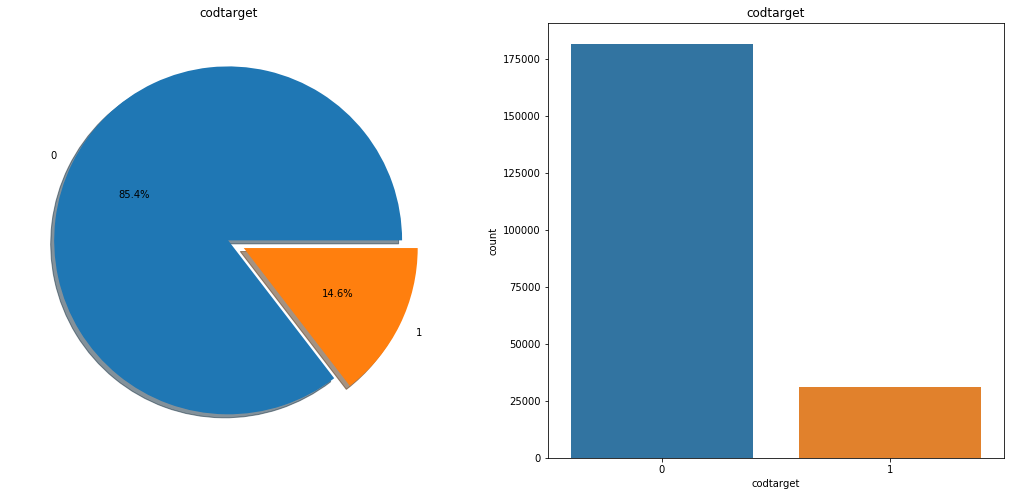

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['codtarget'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('codtarget')
ax[0].set_ylabel('')
sns.countplot('codtarget',data=train,ax=ax[1])
ax[1].set_title('codtarget')
plt.show()

In [6]:
train.describe()

,codmes,id_persona,codtarget,margen,cem,ingreso_neto,linea_ofrecida
count,212665.000000,212665.000000,212665.000000,212665.000000,212665.000000,212665.000000,212665.000000
mean,201902.556881,127773.211173,0.145638,7.534526,867.481424,3136.008953,8100.679002
std,1.149051,73075.565353,0.352743,70.209438,1075.129778,2492.327322,10970.943116
min,201901.000000,1.000000,0.000000,-728.990000,0.000000,653.000000,700.000000
25%,201901.000000,63944.000000,0.000000,-5.000000,344.000000,1889.000000,1700.000000
50%,201903.000000,128109.000000,0.000000,-5.000000,650.000000,2662.000000,4200.000000
75%,201904.000000,190473.000000,0.000000,-5.000000,1064.000000,3467.000000,9800.000000
max,201904.000000,256375.000000,1.000000,4687.022200,61709.000000,109531.000000,100000.000000


Variables con alta variabilidad en cem, ingreso_neto, linea_ofrecida, acotaremos o reduciremos.

In [7]:
train.groupby("codtarget").margen.describe()

,count,mean,std,min,25%,50%,75%,max
codtarget,,,,,,,,
0,181693.0,-5.000000,0.000000,-5.00,-5.00,-5.00,-5.000000,-5.0000
1,30972.0,81.066606,165.888168,-728.99,-4.57,26.48,98.779235,4687.0222


Tenemos perdida aun siendo codtarget (X=1) con respecto al Margen, se definirá una nueva target, podemos realizar una clasificación o un problema de regresión con excesos de ceros.

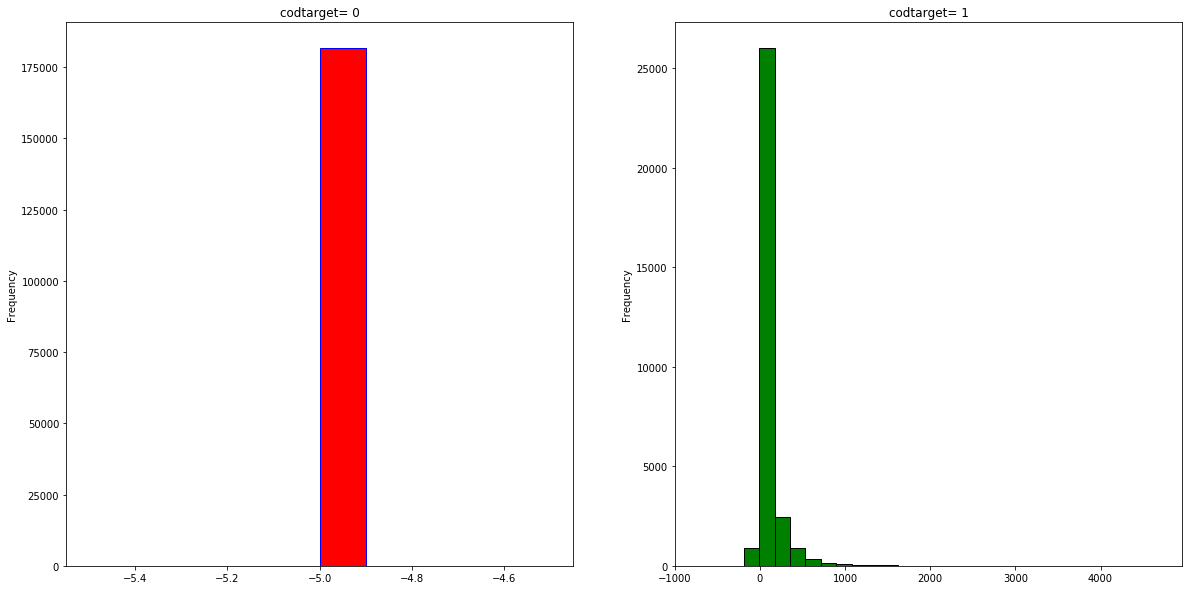

In [8]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['codtarget']==0].margen.plot.hist(ax=ax[0],edgecolor='blue',color='red')
ax[0].set_title('codtarget= 0')
train[train['codtarget']==1].margen.plot.hist(ax=ax[1],bins=30,color='green',edgecolor='black')
ax[1].set_title('codtarget= 1')
plt.show()

# Definiendo la variable target=margen>0

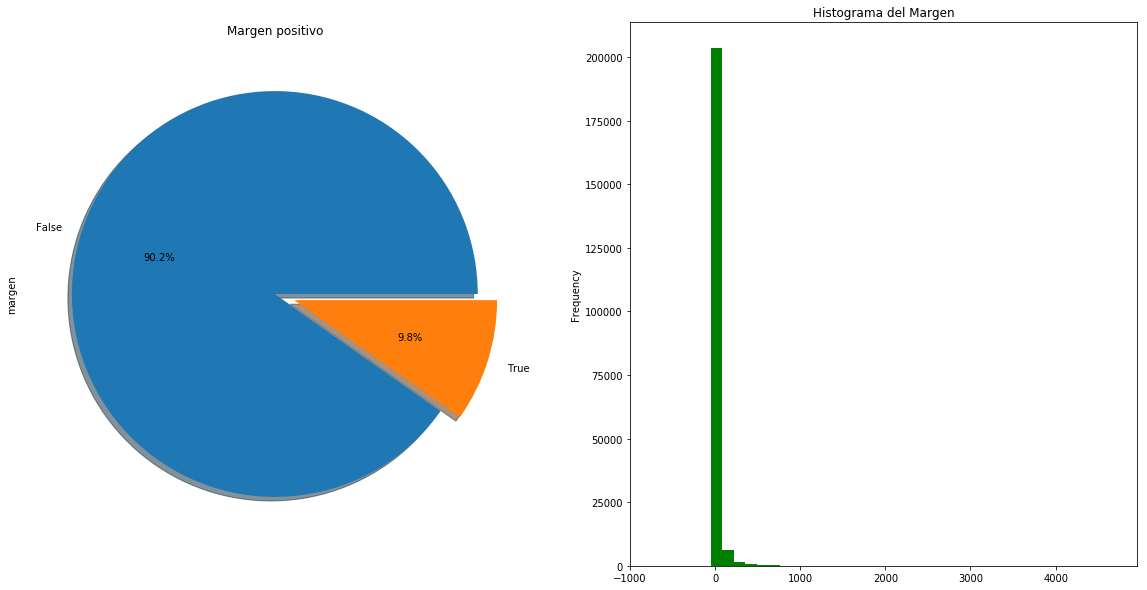

In [4]:
f,ax = plt.subplots(1,2,figsize=(20,10))
(train['margen']>0).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Margen positivo')
train.margen.plot.hist(ax=ax[1],bins=40,color='green')
ax[1].set_title('Histograma del Margen')
plt.show()


In [132]:
train['target'] = (train['margen']>0).astype(int)
print("Se definió la variable target")

Se definió la variable target


In [5]:
import math 
test["cem"]=(test.cem-train.cem.mean())/math.sqrt(train.cem.var())
test["ingreso_neto"]=(test.ingreso_neto-train.ingreso_neto.mean())/math.sqrt(train.ingreso_neto.var())
test["linea_ofrecida"]=(test.linea_ofrecida-train.linea_ofrecida.mean())/math.sqrt(train.linea_ofrecida.var())

train["cem"]=(train.cem-train.cem.mean())/math.sqrt(train.cem.var())
train["ingreso_neto"]=(train.ingreso_neto-train.ingreso_neto.mean())/math.sqrt(train.ingreso_neto.var())
train["linea_ofrecida"]=(train.linea_ofrecida-train.linea_ofrecida.mean())/math.sqrt(train.linea_ofrecida.var())

#ingreso_neto linea_ofrecida

# Analizando las demás datasets y creando nuevas variables


La idea es analizar los demás datasets, para ello empezaremos con:
1... digital


In [5]:
digital = pd.read_csv("ib_base_digital.csv")
digital.shape

(171728, 33)

In [13]:
print("Porcentaje de datos nulos o missing en digital")
digital.isnull().sum()/digital.shape[0]

Porcentaje de datos nulos en digital


codday            0.000000
id_persona        0.000000
simu_prestamo     0.000856
benefit           0.000000
email             0.000000
facebook          0.000000
goog              0.000000
youtb             0.000000
compb             0.000000
movil             0.000000
desktop           0.000000
n_rep30           0.000000
recencia          0.010039
lima_dig          0.000000
provincia_dig     0.000000
extranjero_dig    0.000000
time_ctasimple    0.000745
time_mllp         0.000000
time_mllst        0.000000
time_ctasld       0.000000
time_tc           0.000000
n_sesion          0.000000
busqtc            0.000000
busqvisa          0.000000
busqamex          0.000000
busqmc            0.000000
busqcsimp         0.000000
busqmill          0.000000
busqcsld          0.000000
busq              0.000000
n_pag             0.000000
android           0.534892
iphone            0.951155
dtype: float64

In [97]:
digital.id_persona.describe()

count    171728.000000
mean     133725.548414
std       75567.357423
min          20.000000
25%       59623.000000
50%      139234.000000
75%      200894.000000
max      256375.000000
Name: id_persona, dtype: float64

In [6]:
digital["codmes"] = (digital.codday/100).astype(int)
print(digital.columns)

Index(['codday', 'id_persona', 'simu_prestamo', 'benefit', 'email', 'facebook',
       'goog', 'youtb', 'compb', 'movil', 'desktop', 'n_rep30', 'recencia',
       'lima_dig', 'provincia_dig', 'extranjero_dig', 'time_ctasimple',
       'time_mllp', 'time_mllst', 'time_ctasld', 'time_tc', 'n_sesion',
       'busqtc', 'busqvisa', 'busqamex', 'busqmc', 'busqcsimp', 'busqmill',
       'busqcsld', 'busq', 'n_pag', 'android', 'iphone', 'codmes'],
      dtype='object')


In [7]:
numero_arribadas = ['benefit','email','facebook','goog','youtb','compb']
numero_sesiones = ['movil','desktop']
tiempo_visita = ['time_ctasimple','time_mllp','time_mllst','time_ctasld','time_tc']
numero_buscadores = ['busqtc','busqvisa','busqamex',
                     'busqmc','busqcsimp','busqmill','busqcsld','busq']

In [8]:
digital["numero_arribadas"] = digital[numero_arribadas].sum(axis=1, skipna=True)
digital["numero_sesiones"] = digital[numero_sesiones].sum(axis=1, skipna=True)
digital["tiempo_visita"] = digital[tiempo_visita].sum(axis=1, skipna=True)
digital["numero_buscadores"] = digital[numero_buscadores].sum(axis=1, skipna=True)

In [9]:

digital1 = digital.groupby(['codmes',"id_persona"]).simu_prestamo.mean()
digital1_numero_arribadas_mean = digital.groupby(['codmes',"id_persona"]).numero_arribadas.mean()
digital1_numero_sesiones_mean = digital.groupby(['codmes',"id_persona"]).numero_sesiones.mean()
digital1_tiempo_visita_mean = digital.groupby(['codmes',"id_persona"]).tiempo_visita.mean()
digital1_numero_buscadores_mean = digital.groupby(['codmes',"id_persona"]).numero_buscadores.mean()

In [11]:
digital1.shape,digital1_numero_arribadas_mean.shape,digital1_numero_sesiones_mean.shape,digital1_tiempo_visita_mean.shape,digital1_numero_buscadores_mean.shape

((32044,), (32044,), (32044,), (32044,), (32044,))

In [10]:
import gc
gc.collect()

meses = {
    201901: slice(201811),
    201902: slice(2018011,201912),
    201903: slice(2018012),
    201904: slice(201901),
    201905: slice(201902),
    201906: slice(201903),
    201907: slice(201904)
}

digitall = []
for mes in meses.keys():
    print("*"*10, mes, "*"*10)
    res = pd.concat([
        digital1.loc[meses[mes]].groupby("id_persona").sum(),
        digital1_numero_arribadas_mean.loc[meses[mes]].groupby("id_persona").sum(),
        digital1_numero_sesiones_mean.loc[meses[mes]].groupby("id_persona").sum(),
        digital1_tiempo_visita_mean.loc[meses[mes]].groupby("id_persona").sum(),
        digital1_numero_buscadores_mean.loc[meses[mes]].groupby("id_persona").sum()
        
    ], axis=1)
    res["codmes"] = mes
    res = res.reset_index().set_index(["id_persona", "codmes"]).astype("float32")
    digitall.append(res)

gc.collect()
print("contatenando digitales")
digitall = pd.concat(digitall)
gc.collect()
digitall

********** 201901 **********
********** 201902 **********
********** 201903 **********
********** 201904 **********
********** 201905 **********
********** 201906 **********
********** 201907 **********
contatenando digitales


,,simu_prestamo,numero_arribadas,numero_sesiones,tiempo_visita,numero_buscadores
id_persona,codmes,,,,,
345,201901,1.0,0.000000,1.000000,0.0,0.0
348,201901,0.0,1.000000,1.000000,0.0,0.0
589,201901,0.0,1.000000,1.000000,0.0,0.0
645,201901,0.0,1.000000,1.000000,0.0,0.0
697,201901,0.0,1.000000,1.250000,0.0,0.0
1032,201901,0.0,1.000000,1.000000,0.0,0.0
1142,201901,0.0,1.000000,1.000000,0.0,0.0
1203,201901,0.0,0.500000,1.000000,0.0,0.0
1799,201901,0.0,1.000000,1.000000,0.0,0.0


In [13]:
print("Porcentaje de datos nulos o missing en digital")
digitall.isnull().sum()/digitall.shape[0]

Porcentaje de datos nulos o missing en digital


simu_prestamo        0.0
numero_arribadas     0.0
numero_sesiones      0.0
tiempo_visita        0.0
numero_buscadores    0.0
dtype: float64

In [11]:
digitall["presencia_digital"]=1

In [17]:
del digital

# Base de datos campanias

In [12]:
campanias = pd.read_csv('ib_base_campanias.csv')

In [7]:
campanias.head()

,codmes,id_persona,producto,canal_asignado
0,201801,213598,Adelanto de Sueldo,RED DE TIENDAS
1,201801,237325,Adelanto de Sueldo,RED DE TIENDAS
2,201801,82808,Adquisición Convenios,FFVV
3,201801,90555,Adquisición Convenios,FFVV
4,201801,93408,Adquisición Convenios,FFVV


In [13]:
camp_canal = campanias.groupby(["codmes", "id_persona", "canal_asignado"]).size().unstack(level=2, fill_value=0).reset_index().set_index("codmes").sort_index().astype("int32")
camp_prod = campanias.groupby(["codmes", "id_persona", "producto"]).size().unstack(level=2, fill_value=0).reset_index().set_index("codmes").sort_index().astype("int32")
del campanias


In [14]:
import gc
gc.collect()

meses = {
    201901: slice(201808, 201810),
    201902: slice(201809, 201811),
    201903: slice(201810, 201812),
    201904: slice(201811, 201901),
    201905: slice(201812, 201902),
    201906: slice(201901, 201903),
    201907: slice(201902, 201904)
}
#meses = {
 #   201901: slice(201808, 201812),
  #  201902: slice(201808, 201901),
   # 201903: slice(201901, 201902),
   # 201904: slice(201901, 201903),
   # 201905: slice(201902, 201903),
   # 201906: slice(201811, 201904),
   #201907: slice(201812, 201904)
#}
complementos = []
for mes in meses.keys():
    print("*"*10, mes, "*"*10)
    res = pd.concat([
        camp_canal.loc[meses[mes]].groupby("id_persona").sum(),
        camp_prod.loc[meses[mes]].groupby("id_persona").sum()
        
    ],axis=1)
    res["codmes"] = mes
    res = res.reset_index().set_index(["id_persona", "codmes"]).astype("float32")
    complementos.append(res)

gc.collect()
print("contatenando complementos")
complementos = pd.concat(complementos)
gc.collect()

********** 201901 **********
********** 201902 **********
********** 201903 **********
********** 201904 **********
********** 201905 **********
********** 201906 **********
********** 201907 **********
contatenando complementos


14

In [15]:
complementos=complementos.loc[:,complementos.var()!=0]
complementos.shape

(1312320, 62)

In [26]:
complementos.isnull().sum()/complementos.shape[0]

ABP                                  0.001926
AC_PROV                              0.001926
BANCA TELEFONICA                     0.001926
BOLSA                                0.001926
BOLSA(EX)                            0.001926
CARTERA                              0.001926
CARTERAS                             0.001926
CAV                                  0.001926
EBP                                  0.001926
EBP_LIMA                             0.001926
ER                                   0.001926
EXPRESS                              0.001926
EXPRESS ABP                          0.001926
EXPRESS-ABP                          0.001926
FFVV                                 0.001926
GT                                   0.001926
RED DE TIENDAS                       0.001926
RED_DE_TIENDAS                       0.001926
S1P                                  0.001926
SOMOS_UNO_PROVINCIA                  0.001926
TELEVENTAS                           0.001926
TLV                               

In [16]:
complementos["presencia_complementos"]=1

In [17]:
train = train.join(complementos, on=["id_persona", "codmes"])
train = train.join(digitall, on=["id_persona", "codmes"])

test = test.join(complementos, on=["id_persona", "codmes"])
test = test.join(digitall, on=["id_persona", "codmes"])
del complementos, digitall

In [18]:
del camp_canal, camp_prod, digital1_numero_arribadas_mean, digital1_numero_sesiones_mean, digital1_tiempo_visita_mean, digital1_numero_buscadores_mean

In [20]:
train.shape,test.shape

((212665, 78), (178685, 75))

In [33]:
train.head()

,codmes,id_persona,codtarget,margen,cem,ingreso_neto,linea_ofrecida,prediction_id,target,ABP,...,TELEVENTAS,Upgrade,Upgrade TC,presencia_complementos,simu_prestamo,numero_arribadas,numero_sesiones,tiempo_visita,numero_buscadores,presencia_digital
0,201901,165747,0,-5.00,1.0,1781.0,1700,165747_201901,0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,201903,100117,0,-5.00,478.0,2106.0,2100,100117_201903,0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,201901,65751,1,342.99,687.0,3083.0,4600,65751_201901,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201901,58047,0,-5.00,182.0,1814.0,3600,58047_201901,0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,201901,113221,0,-5.00,582.0,2153.0,4300,113221_201901,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.5,0.0,0.0,1.0


# Base de datos sunat reniec y vehicular


In [21]:
sunat = pd.read_csv("ib_base_sunat.csv")
reniec = pd.read_csv("ib_base_reniec.csv")
vehicular = pd.read_csv("ib_base_vehicular.csv")

In [35]:
reniec.head()

,id_persona,soc_var1,soc_var2,soc_var3,soc_var4,soc_var5,soc_var6
0,219861,0.886792,4,2,6,5,10.0
1,105627,0.641509,4,2,1,2,8.0
2,94514,0.490566,4,2,6,5,10.0
3,55357,0.584906,4,2,6,5,1.0
4,79861,0.603774,4,1,6,5,9.0


In [41]:
sunat.isnull().sum()/len(sunat)

id_persona     0.0
activ_econo    0.0
meses_alta     0.0
dtype: float64

In [42]:
vehicular.isnull().sum()/len(vehicular)

id_persona    0.000000
marca         0.000728
veh_var1      0.056644
veh_var2      0.037295
dtype: float64

# Creando clusters en la base de datos reniec

Imputando los valores por la mediana.int

In [36]:
reniec.isnull().sum()/len(reniec)

id_persona    0.000000
soc_var1      0.000000
soc_var2      0.000000
soc_var3      0.000000
soc_var4      0.000000
soc_var5      0.000000
soc_var6      0.045804
dtype: float64

In [22]:
reniec.soc_var6 = reniec.soc_var6.fillna(reniec.soc_var6.median())

Creando cluster con de personas en la base de datos reniec: la idea básica es crear grupos de personas que tengan caracteristicas semejantes para luego agruparlos, así entonces encontrar si existe similitud entre los clientes y los no clientes.

In [23]:
from sklearn.cluster import KMeans
# Colocaremos 2 como número de clusters
kmeans = KMeans(n_clusters=2)
# imprimiendo 
kmeans = kmeans.fit(reniec.drop(["id_persona"],axis=1))
# Getting the cluster labels
labels = kmeans.predict(reniec.drop(["id_persona"],axis=1))


In [39]:
pd.crosstab(labels,columns="cluster")

col_0,cluster
row_0,
0,114743
1,141608


In [24]:
reniec["cluster"]=labels

In [25]:
sunat["presencia_sunat"]=1
reniec["presencia_reniec"]=1
vehicular["presencia_vehicular"]=1

In [26]:
sunat_activ_econo_one_hot = pd.get_dummies(sunat.activ_econo) 
sunat_activ_econo_one_hot = pd.concat([sunat_activ_econo_one_hot,sunat.id_persona],axis=1)
sunat_activ_econo_one_hot =sunat_activ_econo_one_hot.loc[sunat_activ_econo_one_hot.id_persona.duplicated()==False,].set_index("id_persona")
sunat_años_alta = (sunat.groupby(["id_persona"]).meses_alta.mean()/12)
sunat_años_alta = pd.DataFrame(sunat_años_alta)
sunat_presencia_sunat = sunat.loc[sunat.id_persona.duplicated()==False,].set_index("id_persona")["presencia_sunat"]
sunat_presencia_sunat = pd.DataFrame(sunat_presencia_sunat)
vehicular1 = vehicular.groupby(["id_persona", "marca"]).veh_var1.sum().unstack(level=1, fill_value=0).astype("float32")
vehicular2 = vehicular.groupby(["id_persona", "marca"]).veh_var2.sum().unstack(level=1, fill_value=0).astype("float32")
vehicular_presencia_vehicular = vehicular.loc[vehicular.id_persona.duplicated()==False,].set_index("id_persona")["presencia_vehicular"]
vehicular_presencia_vehicular = pd.DataFrame(vehicular_presencia_vehicular)
reniec = reniec.set_index("id_persona").astype("float32")
del vehicular 

In [27]:
vehicular1.columns = [c + "_v1" for c in vehicular1.columns]
vehicular2.columns = [c + "_v2" for c in vehicular2.columns]
sunat_activ_econo_one_hot.columns = [c + "__sunat" for c in sunat_activ_econo_one_hot.columns]

In [28]:
len(vehicular1.columns)+len(vehicular2.columns)+len(sunat_activ_econo_one_hot.columns)+len(reniec.columns)

1204

In [29]:
vehicular1.shape
vehicular1 = vehicular1.loc[:,vehicular1.var()!=0]
vehicular2 = vehicular2.loc[:,vehicular2.var()!=0]


In [30]:
train = train.set_index("id_persona").join(vehicular1).join(vehicular2).join(reniec).join(sunat_años_alta).join(sunat_activ_econo_one_hot).join(sunat_presencia_sunat).join(vehicular_presencia_vehicular)
test = test.set_index("id_persona").join(vehicular1).join(vehicular2).join(reniec).join(sunat_años_alta).join(sunat_activ_econo_one_hot).join(sunat_presencia_sunat).join(vehicular_presencia_vehicular)
train = train.reset_index().set_index("prediction_id")
test = test.reset_index().set_index("prediction_id")
del vehicular1, vehicular2, reniec, sunat, sunat_años_alta, sunat_activ_econo_one_hot, vehicular_presencia_vehicular, sunat_presencia_sunat

In [31]:
train.shape,test.shape

((212665, 1164), (178685, 1161))

In [60]:
test.head()

,id_persona,codmes,cem,ingreso_neto,linea_ofrecida,ABP,AC_PROV,BANCA TELEFONICA,BOLSA,BOLSA(EX),...,Grupo_11__sunat,Grupo_12__sunat,Grupo_13__sunat,Grupo_14__sunat,Grupo_15__sunat,Grupo_16__sunat,Grupo_17__sunat,Otros__sunat,presencia_sunat,presencia_vehicular
prediction_id,,,,,,,,,,,,,,,,,,,,,
1_201906,1,201906,218.0,2662.0,9300,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4_201906,4,201906,75.0,1717.0,1000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_201905,4,201905,62.0,1700.0,1000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6_201906,6,201906,908.0,2232.0,7800,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7_201905,7,201905,90.0,1072.0,2100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
train.isnull().sum()/len(train.AC_PROV)

id_persona             0.000000
codmes                 0.000000
codtarget              0.000000
margen                 0.000000
cem                    0.000000
ingreso_neto           0.000000
linea_ofrecida         0.000000
target                 0.000000
ABP                    0.233179
AC_PROV                0.233179
BANCA TELEFONICA       0.233179
BOLSA                  0.233179
BOLSA(EX)              0.233179
CARTERA                0.233179
CARTERAS               0.233179
CAV                    0.233179
EBP                    0.233179
EBP_LIMA               0.233179
ER                     0.233179
EXPRESS                0.233179
EXPRESS ABP            0.233179
EXPRESS-ABP            0.233179
FFVV                   0.233179
GT                     0.233179
RED DE TIENDAS         0.233179
RED_DE_TIENDAS         0.233179
S1P                    0.233179
SOMOS_UNO_PROVINCIA    0.233179
TELEVENTAS             0.233179
TLV                    0.233179
                         ...   
ZXAUTO_v

In [42]:
test.isnull().sum()/len(test.AC_PROV)

id_persona             0.000000
codmes                 0.000000
cem                    0.000000
ingreso_neto           0.000000
linea_ofrecida         0.000000
ABP                    0.155611
AC_PROV                0.155611
BANCA TELEFONICA       0.155611
BOLSA                  0.155611
BOLSA(EX)              0.155611
CARTERA                0.155611
CARTERAS               0.155611
CAV                    0.155611
EBP                    0.155611
EBP_LIMA               0.155611
ER                     0.155611
EXPRESS                0.155611
EXPRESS ABP            0.155611
EXPRESS-ABP            0.155611
FFVV                   0.155611
GT                     0.155611
RED DE TIENDAS         0.155611
RED_DE_TIENDAS         0.155611
S1P                    0.155611
SOMOS_UNO_PROVINCIA    0.155611
TELEVENTAS             0.155611
TLV                    0.155611
TLV CD                 0.155611
TLV SEGMENTOS          0.155611
Adelanto de Sueldo     0.176460
                         ...   
ZONGQING

In [ ]:
# liberando memoria

In [32]:
train[["presencia_digital","presencia_complementos","presencia_sunat","presencia_reniec","presencia_vehicular"]] = train[["presencia_digital","presencia_complementos","presencia_sunat","presencia_reniec","presencia_vehicular"]].fillna(0)
test[["presencia_digital","presencia_complementos","presencia_sunat","presencia_reniec","presencia_vehicular"]] = test[["presencia_digital","presencia_complementos","presencia_sunat","presencia_reniec","presencia_vehicular"]].fillna(0)

In [33]:
var = test.loc[:,test.var()==0].columns

In [34]:
test = test.drop(var,axis=1)
train = train.drop(var,axis=1)
del var

In [35]:
train.shape,test.shape

((212665, 979), (178685, 976))

# Base de datos rcc

In [36]:
rcc = pd.read_csv("ib_base_rcc.csv")

In [57]:
rcc.head()

,codmes,id_persona,cod_banco,producto,clasif,mto_saldo,rango_mora
0,201811,10155,29,PRESTAMOS COMERCIALES,0.0,36698.4870,1.0
1,201804,75442,29,PRESTAMO PERSONAL,0.0,7971.1182,1.0
2,201902,172772,29,PRESTAMOS COMERCIALES,0.0,821.6077,1.0
3,201810,187572,29,PRESTAMOS COMERCIALES,0.0,9271.8030,1.0
4,201903,255598,29,PRESTAMOS COMERCIALES,0.0,10548.7263,1.0


In [63]:
rcc.isnull().sum()/len(rcc)

codmes        0.000000
id_persona    0.000000
cod_banco     0.000000
producto      0.000000
clasif        0.414371
mto_saldo     0.000000
rango_mora    0.414371
dtype: float64

In [37]:
rcc_nro_producto = rcc.groupby(["codmes", "id_persona"]).producto.count().reset_index().set_index("codmes").sort_index().astype("int32")
rcc_producto = pd.get_dummies(rcc.producto)
rcc_producto = rcc_producto.join(rcc["id_persona"]).join(rcc["codmes"]).set_index("codmes").sort_index().astype("int32")
rcc_banco = pd.get_dummies(rcc.cod_banco)
rcc_banco.columns = [str(c) + "_v1" for c in rcc_banco.columns]
rcc_banco = rcc_banco.join(rcc["id_persona"]).join(rcc["codmes"]).set_index("codmes").sort_index().astype("int32")
rcc_rango_mto_saldo = rcc.groupby(["codmes", "id_persona", "rango_mora"]).mto_saldo.sum().unstack(level=2, fill_value=0)
rcc_rango_mto_saldo.columns =["rango_1_saldo","rango_2_saldo","rango_3_saldo","rango_4_saldo","rango_5_saldo","rango_6_saldo","rango_7_saldo"] 
rcc_rango_mto_saldo = rcc_rango_mto_saldo.reset_index().set_index("codmes").sort_index().astype("int32")
rcc_mto = rcc.groupby(["codmes", "id_persona"]).mto_saldo.sum().reset_index().set_index("codmes").sort_index().astype("int32")
rcc_rango_mora = pd.get_dummies(rcc.rango_mora,prefix_sep="rango")
rcc_rango_mora.columns = ["rango_1","rango_2","rango_3","rango_4","rango_5","rango_6","rango_7"] 
rcc_rango_mora = rcc_rango_mora.join(rcc["id_persona"]).join(rcc["codmes"]).set_index("codmes").sort_index().astype("int32")
del rcc

In [38]:
import gc
gc.collect()

meses = {
    201901: slice(201807, 201809),
    201902: slice(201808, 201810),
    201903: slice(201809, 201811),
    201904: slice(201810, 201812),
    201905: slice(201811, 201901),
    201906: slice(201812, 201902),
    201907: slice(201901, 201903)
}
#meses = {
 #   201901: slice(201808, 201812),
  #  201902: slice(201808, 201901),
   # 201903: slice(201901, 201902),
   # 201904: slice(201901, 201903),
   # 201905: slice(201902, 201903),
   # 201906: slice(201811, 201904),
   #201907: slice(201812, 201904)
#}
rcc_tc = []
for mes in meses.keys():
    print("*"*10, mes, "*"*10)
    res = pd.concat([
        rcc_nro_producto.loc[meses[mes]].groupby("id_persona").sum(),
        rcc_producto.loc[meses[mes]].groupby("id_persona").sum(),
        rcc_banco.loc[meses[mes]].groupby("id_persona").sum(),
        rcc_rango_mto_saldo.loc[meses[mes]].groupby("id_persona").mean(),
        rcc_mto.loc[meses[mes]].groupby("id_persona").sum(),
        rcc_rango_mora.loc[meses[mes]].groupby("id_persona").sum()
    ],axis=1)
    res["codmes"] = mes
    res = res.reset_index().set_index(["id_persona", "codmes"]).astype("float32")
    rcc_tc.append(res)
    

gc.collect()
print("contatenando los datos")
rcc_tc = pd.concat(rcc_tc)
gc.collect()

********** 201901 **********
********** 201902 **********
********** 201903 **********
********** 201904 **********
********** 201905 **********
********** 201906 **********
********** 201907 **********
contatenando los datos


14

In [80]:
rcc_tc.shape

(1541393, 91)

In [39]:
rcc_tc = rcc_tc.loc[:,rcc_tc.var()>0.001]

In [66]:
rcc_tc.isnull().sum()/len(rcc_tc)

producto                       0.000000
CARTAS FIANZAS OTORGADAS       0.000000
CREDITOS CASTIGOS              0.000000
HIPOTECARIO MIVIVIENDA         0.000000
HIPOTECARIO REGULAR            0.000000
LINEA TOTAL TC                 0.000000
OTROS CREDITOS                 0.000000
PRESTAMO PERSONAL              0.000000
PRESTAMOS COMERCIALES          0.000000
RESTO RD                       0.000000
SOBREGIRO                      0.000000
TARJETAS COMPRAS               0.000000
TARJETAS EFECTIVO              0.000000
TARJETAS OTROS CONCEPTOS       0.000000
TARJETAS SIN DEFINIR           0.000000
TARJETA_EMP COMPRA             0.000000
TARJETA_EMP EFECTIVO           0.000000
TARJETA_EMP OTROS CONCEPTOS    0.000000
TARJETA_EMP SIN DEFINIR        0.000000
VEHICULAR                      0.000000
2                              0.000000
3                              0.000000
4                              0.000000
5                              0.000000
7                              0.000000


In [40]:
rcc_tc["presencia_rcc"]=1

In [41]:
gc.collect()
train = train.reset_index()
train = train.join(rcc_tc, on=["id_persona", "codmes"])
gc.collect()
test = test.reset_index()
test = test.join(rcc_tc, on=["id_persona", "codmes"])

train = train.reset_index().set_index("prediction_id").astype("float32")
test = test.reset_index().set_index("prediction_id").astype("float32")
del rcc_mto,rcc_nro_producto,rcc_producto,rcc_rango_mora,rcc_rango_mto_saldo,rcc_tc,rcc_banco

In [47]:
train["presencia_rcc"]=train["presencia_rcc"].fillna(0)
test["presencia_rcc"]=test["presencia_rcc"].fillna(0)

In [48]:
train.shape, test.shape

((212665, 1072), (178685, 1069))

In [49]:
non_ascii = train.columns[[not all(ord(c) < 128 for c in s) for s in train.columns]].tolist()
non_ascii

['Adquisición Convenios',
 'Adquisición TC',
 'Alcancía',
 'CD Préstamos',
 'Crédito Hipotecario',
 'Crédito Vehicular',
 'Depósito a Plazo',
 'Préstamo Express',
 'Préstamos Personales',
 'Préstamos Reenganche',
 'LIMA MOTORÂ´S_v1',
 'VICTORIA MOTORÂ´S_v1',
 'VILMENÂ¨S_v1',
 'LIMA MOTORÂ´S_v2',
 'VICTORIA MOTORÂ´S_v2',
 'VILMENÂ¨S_v2']

In [50]:
for i, c in enumerate(non_ascii):
    train["non_ascii_" + str(i)] = train[c]
    train = train.drop(c, axis= 1)
    test["non_ascii_" + str(i)] = test[c]
    test = test.drop(c, axis= 1)

In [51]:
train = train.drop("index",axis=1)
test = test.drop("index",axis=1)

In [52]:
train.id_persona=train.id_persona.astype("int32")
train.codmes=train.codmes.astype("int32")
test.id_persona=test.id_persona.astype("int32")
test.codmes=test.codmes.astype("int32")
train.cluster=train.cluster.fillna(0)
test.cluster=test.cluster.fillna(0)